<a href="https://colab.research.google.com/github/FulISun/Computer_Vision/blob/main/CNN/03_Fashion_MNIST_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Example

* 정확도가 잘 안나오면 하이퍼 파라미터 먼저 수정하기~

> learning rate -> epoch -> architecture 순으로 수정할 것

* accuracy는 그대로인데 loss만 감소하는 경우는 맞추는 값만 맞추고 틀린 값은 계속 틀려서 => decision making 필요함. 데이터 확인해서 코딩 오류 수정하거나 해당 값 삭제 해야함

ex) 정답 = [ 1, 2, 3, 4 ]

    예측1 = [ 1, 2, 3, 3 ]

    예측2 = [ 1, 2, 3, 10 ]

    인 경우 둘 다 정확도는 0.75지만 loss가 예측2의 loss가 더 큼


## [1] Data 생성 및 확인

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\n train shape = ', x_train.shape, ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력

4431872/4422102 [==============================] - 0s 0us/step

 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [9 0 0 ... 3 0 5]
 test label  =  [9 2 1 ... 8 1 5]


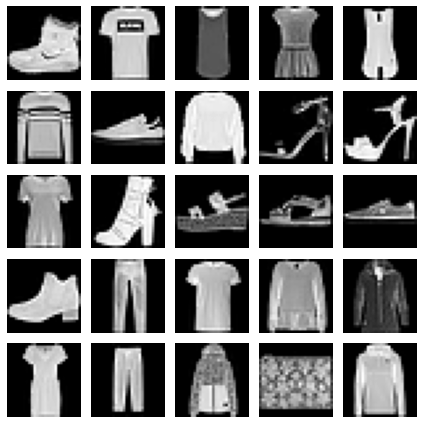

In [ ]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')  

plt.tight_layout()
plt.show()

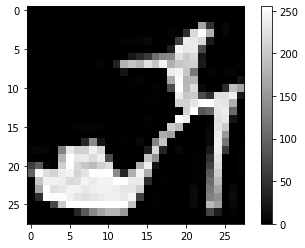

In [ ]:
plt.imshow(x_train[9].reshape(28,28), cmap='gray') 
plt.colorbar()   
plt.show()

## [2] 데이터 전처리

In [ ]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)

## [3] 모델 구축 및 컴파일 

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## [4] 모델 학습 & Callback

* Callback 함수는 초기 모델에는 사용하지 말 것. 하이퍼 파라미터랑 모델 아키텍처랑 여러번 수정해본 후 수행할 것.

### ReduceLROnPlateau

* 모델의 성능 개선이 없을 경우, Learning Rate를 조절해 모델의 개선을 유도하는 콜백함수. factor 파라미터를 통해서 학습율을 조정함 (factor < 1.0)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor = 'val_loss',    # val_loss 기준으로 callback 호출
                             factor = 0.5,            # callback 호출시 학습률을 1/2로 줄임
                             patience = 5,            # epoch 5 동안 개선되지 않으면 callback 호출
                             verbose = 1)             # 로그 출력

In [ ]:
hist = model.fit(x_train, t_train,
                 epochs = 50, validation_split = 0.2,
                 callbacks = [reduceLR])

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2691 - accuracy: 0.9040 - val_loss: 0.3297 - val_accuracy: 0.8836 - lr: 1.0000e-04
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2660 - accuracy: 0.9054 - val_loss: 0.3274 - val_accuracy: 0.8831 - lr: 1.0000e-04
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2645 - accuracy: 0.9052 - val_loss: 0.3270 - val_accuracy: 0.8832 - lr: 1.0000e-04
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2620 - accuracy: 0.9067 - val_loss: 0.3239 - val_accuracy: 0.8860 - lr: 1.0000e-04
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2599 - accuracy: 0.9070 - val_loss: 0.3256 - val_accuracy: 0.8852 - lr: 1.0000e-04
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9089 - val_loss: 0.3249 - val_accuracy: 0.8850 - lr: 1.0000e-04
Epoch 7/50
1500/1500 [============

### ModelCheckpoint

* 모델이 학습하면서 정의한 조건을 만족했을 때 model의 weigth값을 중간 저장함

* 학습시간이 오래 걸린다몀델이 개선된 validation score를 도출해낼 때마다 weight를 불러와서 중간 저장함으로써, 혹시 중간에 memory overflow나 crash가 나더라도 다시 weight를 불러와서 학습을 이어나갈 수 있기 때문에, 시간을 save 함

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = './modelcheckpoint_test.h5'                 # 저장할 파일 패스

checkpoint = ModelCheckpoint(file_path,                 # 저장할 파일 패스
                             moniter = 'val_loss',      # val_loss 값이 개선되었을 때 호출
                             verbose = 1,               # log 출력
                             save_best_only = True,     # bset 값만 저장
                             model = 'auto')            # auto는 자동으로 best 찾음

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2, callbacks = [checkpoint])

Epoch 1/30
1490/1500 [============================>.] - ETA: 0s - loss: 0.7852 - accuracy: 0.7457

KeyboardInterrupt: ignored

### EarlyStopping

* 모델 성능 지표가 설정한 epoch 동안 개선되지 않을 때 조기 종료

* 일반적으로 EalryStopping과 ModelCheckpoint 조합을 통하여, 개선되지 않는 학습에 대한 조기종료를 실행하고, ModelCheckpoint로부터 가장 best model을 다시 로드하여 학습을 재게할 수 있음

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

file_path = './modelcheckpoint_test.h5'                 # 저장할 파일 패스

checkpoint = ModelCheckpoint(file_path,                 # 저장할 파일 패스
                             moniter = 'val_loss',      # val_loss 값이 개선되었을 때 호출
                             verbose = 1,               # log 출력
                             save_best_only = True,     # bset 값만 저장
                             model = 'auto')            # auto는 자동으로 best 찾음

stopping = EarlyStopping(monitor='val_loss',            # 관찰 대상은 val_loss
                         patience = 5)                  # 5 epoch 동안 개선되지 않으면 조기종료


hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2,
                 callbacks = [checkpoint, stopping])

Epoch 1/30
1493/1500 [============================>.] - ETA: 0s - loss: 0.3636 - accuracy: 0.8695
Epoch 1: val_loss improved from inf to 0.37178, saving model to ./modelcheckpoint_test.h5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3636 - accuracy: 0.8695 - val_loss: 0.3718 - val_accuracy: 0.8673
Epoch 2/30
1496/1500 [============================>.] - ETA: 0s - loss: 0.3196 - accuracy: 0.8823
Epoch 2: val_loss improved from 0.37178 to 0.34138, saving model to ./modelcheckpoint_test.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3195 - accuracy: 0.8824 - val_loss: 0.3414 - val_accuracy: 0.8784
Epoch 3/30
1494/1500 [============================>.] - ETA: 0s - loss: 0.3015 - accuracy: 0.8891
Epoch 3: val_loss did not improve from 0.34138
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3016 - accuracy: 0.8891 - val_loss: 0.3480 - val_accuracy: 0.8781
Epoch 4/30
1494/1500 [============================>.] - ETA: 0s - loss: 0.29

In [ ]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3529 - accuracy: 0.8806


[0.35292068123817444, 0.8805999755859375]

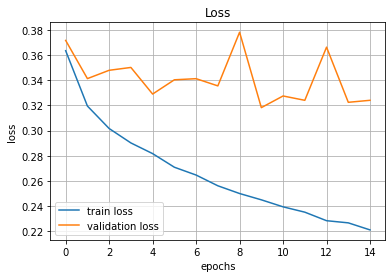

In [ ]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

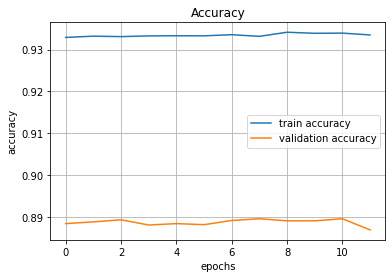

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28,28)))

model.add(tf.keras.layers.Dense(100, activation = 'relu'))

model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer = SGD(learning_rate = 0.1), loss = 'sparse_categoricalentropy',
              metrics = ['accuracy'])

In [ ]:
reduceLR = ReduceLROnPlateau()